# Исследование игр в интернет - магазине "Стримчик"

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

Данные хранятся в файле `games.csv`

* `Name` — название игры
  
* `Platform` — платформа 
* `Year_of_Release` — год выпуска 
* `Genre` — жанр игры 
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий) 
* `EU_sales` — продажи в Европе (миллионы проданных копий) 
* `JP_sales` — продажи в Японии (миллионы проданных копий) 
* `Other_sales` — продажи в других странах (миллионы проданных копий) 
* `Critic_Score` — оценка критиков (максимум 100) 
* `User_Score` — оценка пользователей (максимум 10) 
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Общая информация о данных 

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import missingno as msno

**Считаем CSV-файл `games.csv` и сохраним его в датафрейм `data`**

In [4]:
# Загружаем данные
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [6]:
# Функция для общей информации о данных
def information(dataset):
    display(dataset.head())
    display(dataset.tail())
    print(dataset.info())
    print(dataset.describe())
    dataset.hist(figsize = (10, 10))
    plt.show()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.81

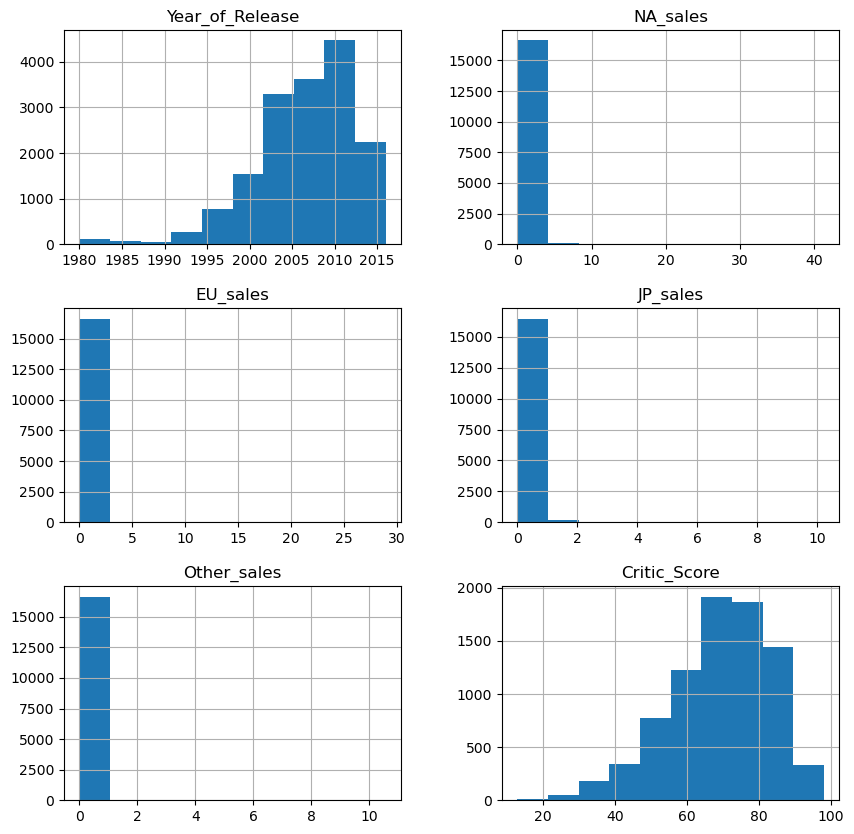

In [8]:
information(data)

**При изучении общей информации о данных можно выделить важные моменты:**
* Данные состоят из 16 715 строк и 11 столбцов
* Названия столбцов требуется привести к общему виду 
* Частично отсутствуют значения в столбцах как в незначительном количестве, так и в больших объёмах
* Формат значений не везде соответствует логичному и необходимому

**Гистограммы:**
  * `Year_of_Release` имеет разброс значений с 1980 по 2016 год. Пиковые значения приходятся на интервал с 2009 по 2012 год (примерно).
  * `Critic_Score` имеет разброс значений от 13 до 98. Пиковые значения приходятся на интервал от 65 до 70 (примерно).
    
Остальные значения требуют более подробного анализа, чтобы их даже начально описать.

### Подготовка данных

**Заменим названия столбцов**

In [10]:
# Приведём все названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Преобразуем данные в нужный тип и избавимся от пропусков**

In [14]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Нам необходимо выполнить следующие преобразования:**

1. `year_of_release` **float64 ---> int32**
2. `user_score` **object ---> float64**

In [18]:
# Заменим значения user_score на float64 
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

**Сразу посмотрим на количество пропусков в данных**

In [21]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

<Axes: >

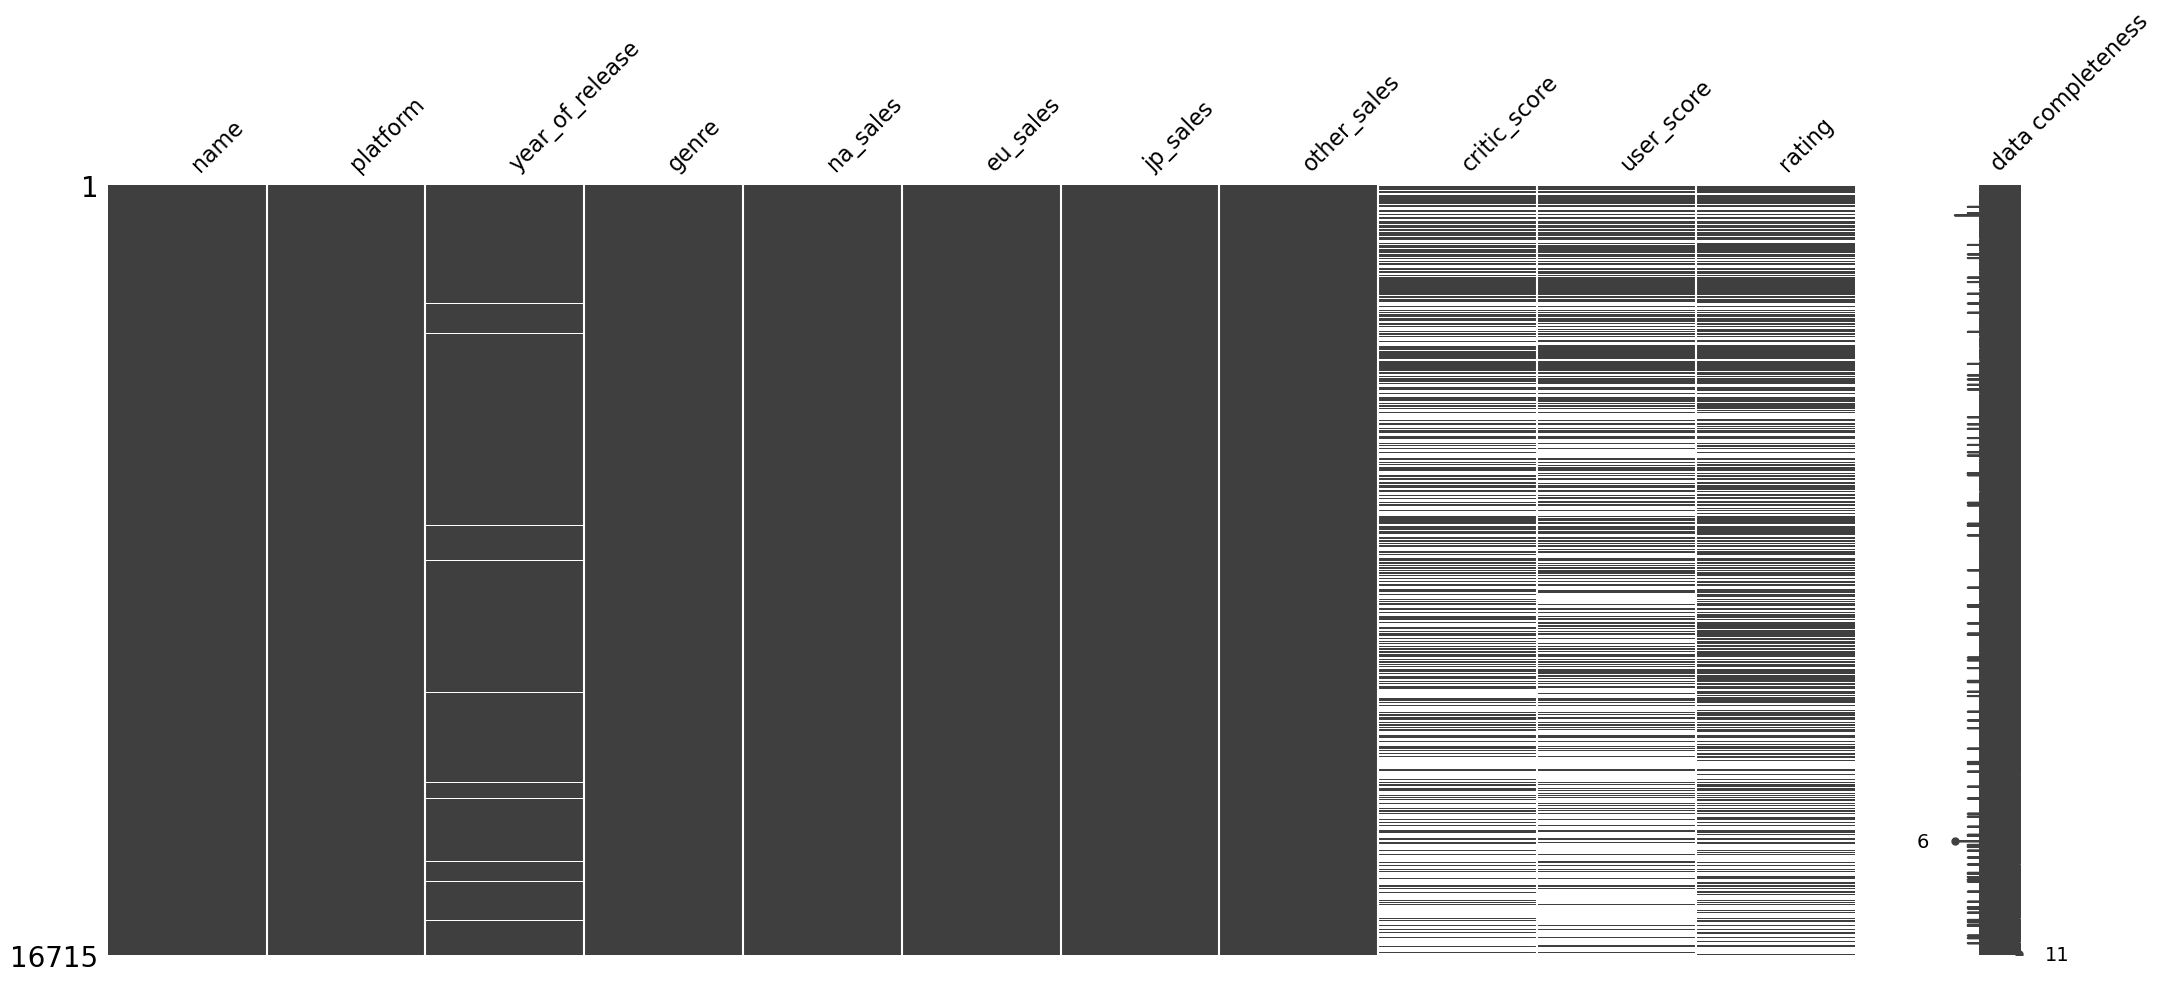

In [25]:
# Визуализируем наши пропуски
msno.matrix(data, labels=True)

**Нам необходимо изучить и возможно избавиться от пропусков в столбцах:**

1. `name` 
2. `year_of_release`
3. `genre`
4. `critic_score`
5. `user_score`
6. `rating`

In [29]:
# Изучим пропуски в name 
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Так как в этих строках отсутствует важная информация для нашего анализа от них можно спокойно избавиться**

**При попытке преобразовать год в столбце `year_of_release` столкнулась с ошибкой, так как NaN значения не позволяли перевести значения в целочисленный тип, чтобы решить данную проблему посмотрим какой процент данные с пропусками года составляют от всего датафрейма:**

In [33]:
print(f' Процент данных с пропущенным годом от общего числа: {data['year_of_release'].isna().sum()/data.shape[0]:.1%}')

 Процент данных с пропущенным годом от общего числа: 1.6%


**Так как данные с пропусками года составляют всего 1.6%, мы можем удалить строки с этими значениями. Нам это позволяет правило сохранения не менее 90% данных после обработки**

In [37]:
# Избавляемся сразу от строк с пропусками в столбцах name и year_of_release
data = data.dropna(subset = ['year_of_release', 'name'])

**Теперь можем перевести `year_of_release` в целочисленный тип данных**

In [40]:
data['year_of_release'] = data['year_of_release'].astype('int32')

**Пропусков в столбце `rating` 6766, поэтому просто удалить эти строки мы не можем. Так как это данные типа object, заполним их значением unknown - неизвестны**

In [43]:
data['rating'] = data['rating'].fillna('unknown')

**Значение 'tbd' в столбце `user_score` означает недостаточное количество оценок, поэтому заменим их на NaN**

In [47]:
data['user_score'] = data['user_score'].replace({'tbd':np.NaN})

In [49]:
# for column in data[['critic_score', 'user_score']]:
    # data[column] = data[column].fillna(-1)

**Посмотрим на результат нашей обработки**

In [52]:
print(data.isna().sum(),'\n', data.dtypes)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64 
 name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [55]:
# Проверим на явные дубликаты
data.duplicated().sum()

0

**Суммарные продажи во всех регионах**

In [59]:
# Суммарные продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']+ data['other_sales']

In [62]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


#### Вывод по предобработке
**Для увеличения качества дальнейшего анализа были проделаны следующие шаги:**
* Привели названия столбцов к общему виду `['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'  'critic_score', 'user_score', 'rating'`
* Изменили тип данных `year_of_release` на **int32**, так как год выражается целочисленно, `user_score` в **float64**, так как эти даннык выраженные числами с плавающей точкой, а не строкой
* Избавились от пропусков в `name`, `year_of_release`, `genre`, `rating`
* Пропуски в `critic_score`, `user_score` оставили, так как количество пропусков весомо для всего датафрейма
* Проверили данные на дубликаты, которых не оказалось
* Добавиои новый столбец `total_sales`, характеризующий общие продажи для каждой игры во всех регионах
]

### Исследовательский анализ

**1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

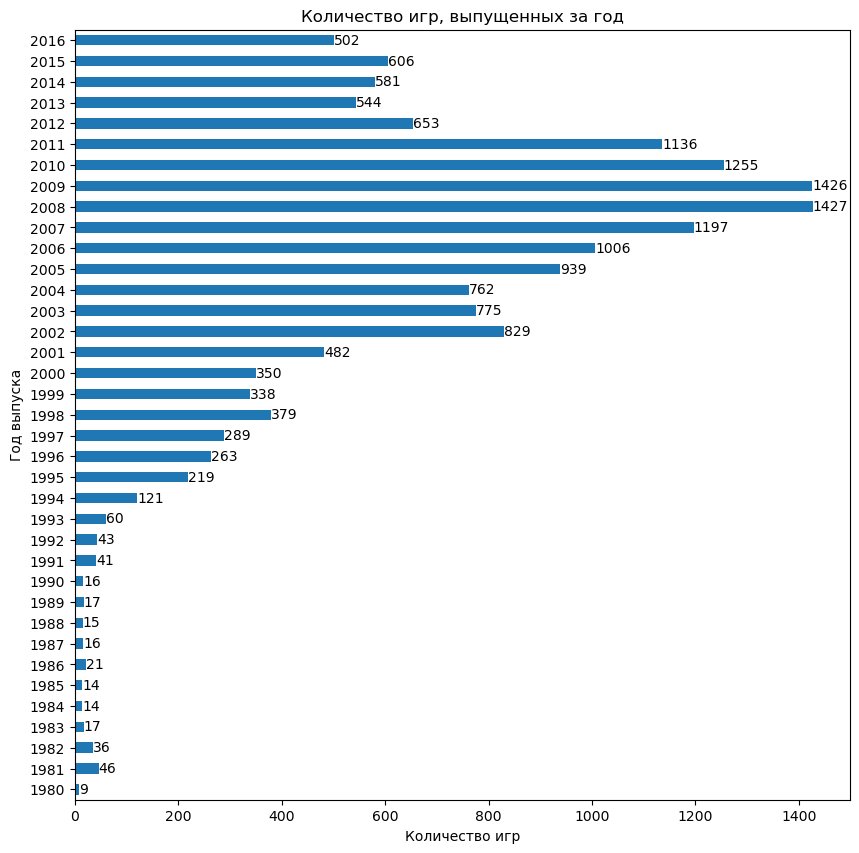

In [68]:
games_for_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

ax = games_for_year.plot.barh(
    y='name', 
    figsize=(10, 10),
    legend = False
)
ax.bar_label(ax.containers[0]) # Делаем аннотацию столбцов 
plt.xlabel('Количество игр')
plt.ylabel('Год выпуска')
plt.title('Количество игр, выпущенных за год')
plt.show()

In [71]:
games_for_year.describe()

,name
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


**Вывод: В полученных данных мы видим распределение количества выпущенных игр по годам.** 
* Максимальное число игр (1427) было выпущено в 2008 году, именно в этом году PS2 обрела свою популярность среди пользователей, а также были выпущены франшизы популярных игровых серий
* Минимум (9) соответствует 1980 году, когда произошел крах видеоигр из-за влияния домашних компьютеров и низкого качества видеоигр
* Началом значимого периода можно считать 2002 год (взлёт до 829), именно в это время на рынке главенствовали PS2 и Xbox
* С 2012 года замечен резкий спад, вызванный неспособностью старых консолей конкурировать с цифровыми гаджетами
  
**Самым значимым периодом, относящимся к нашему исследованию, можно назвать начало 2013 года. Именно в этот момент выпустили PS4, Xbox One, благодаря чему индустрия видеоигр начала восстанавливаться и быстро расти**

**2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

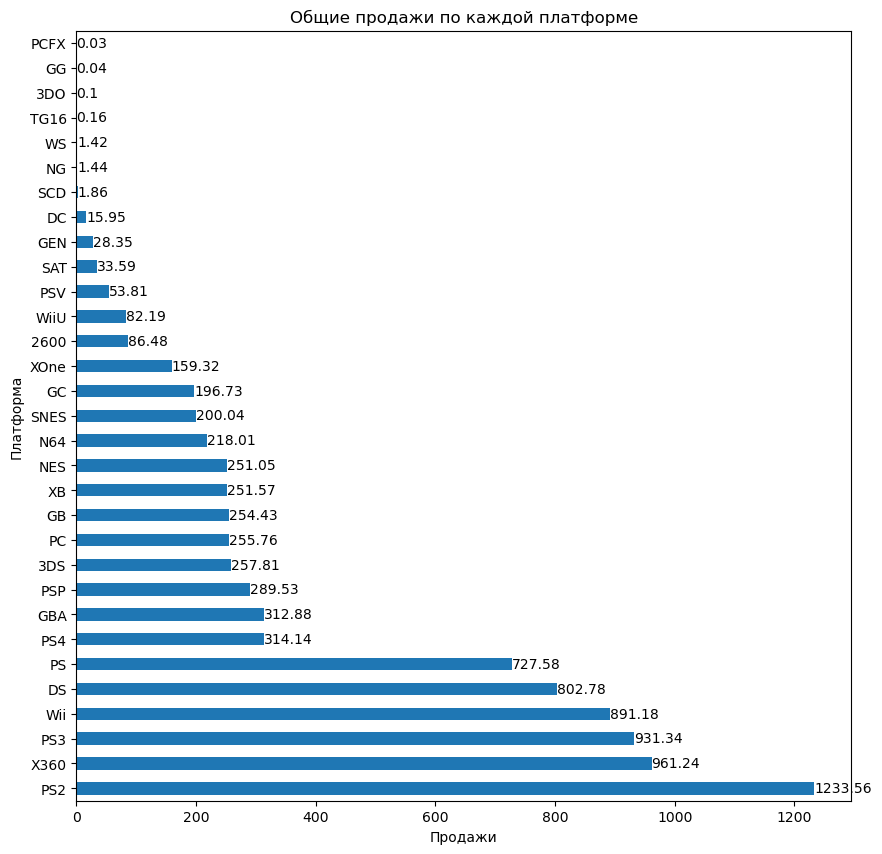

In [75]:
platform_sales = (data
                  .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
                  .sort_values(by = 'total_sales', ascending = False)
                 )

ax = platform_sales.plot.barh(
    y='total_sales', 
    figsize=(10, 10),
    legend = False
)
ax.bar_label(ax.containers[0]) # Делаем аннотацию столбцов 
plt.xlabel('Продажи')
plt.ylabel('Платформа')
plt.title('Общие продажи по каждой платформе')
plt.show()

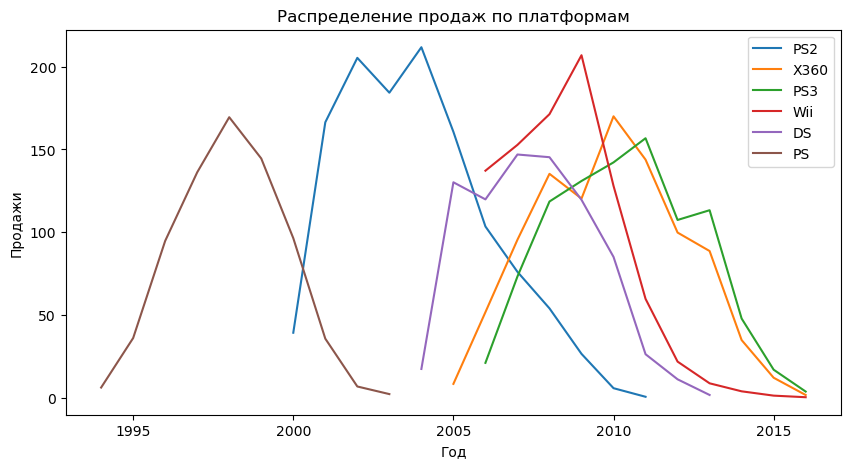

In [80]:
for platform in platform_sales.index[:6]:
    (data
     .query('platform == @platform & year_of_release != 1985')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .sort_values('year_of_release', ascending = False)['total_sales']
     .plot(figsize = (10, 5), label = platform)
    )
    plt.title('Распределение продаж по платформам')
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.legend()

**Вывод:** \
Самым главным "гигантом" индустрии видеоигр является PS2, эта консоль до сих пор считается культовой, обладая огромной игровой библиотекой, доступной ценой для пользователей и продолжительной поддержкой вплоть до 2013 года. На графике можно заметить, как со спадом продаж PS2, ее популярность подхватывает PS3, продолжая наследие Sony.\
В период с 2006 года популярность набирает Nintendo Wii, уникальный контроллер с датчиками движения завоевал огромное внимание пользователей, поэтому данная платформа обладает самым большим пиком продаж. С 2010 года Wii теряет свою популярность, проигрывая PS3 и X360, из-за устаревших технологий.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [85]:
# Создаём датафрейм за период с 2013 года
data_2013 = data[data['year_of_release'] >= 2013]

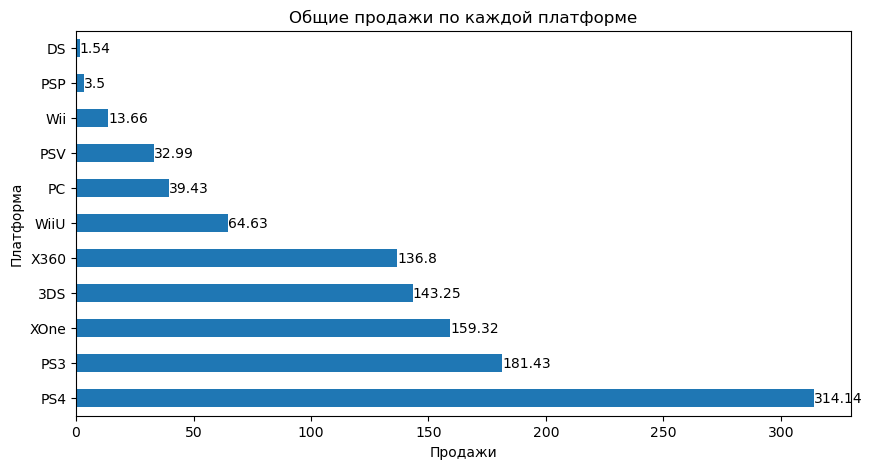

In [87]:
platform_sales_2013 = (data_2013
                  .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
                  .sort_values(by = 'total_sales', ascending = False)
                 )
ax = platform_sales_2013.plot.barh(
    y='total_sales', 
    figsize=(10, 5),
    legend = False
)
ax.bar_label(ax.containers[0]) # Делаем аннотацию столбцов 
plt.xlabel('Продажи')
plt.ylabel('Платформа')
plt.title('Общие продажи по каждой платформе')
plt.show()

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

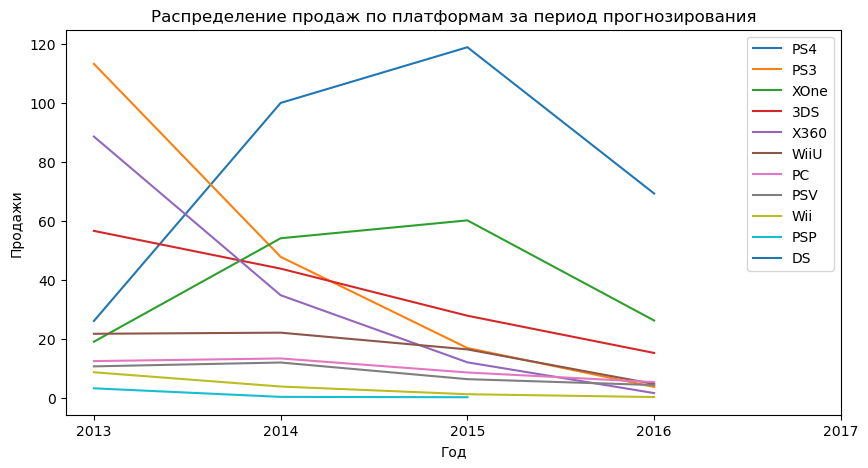

In [90]:
for platform in platform_sales_2013.index[:]:
    (data_2013
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .sort_values('year_of_release', ascending = False)['total_sales']
     .plot(kind='line', figsize = (10, 5), label=platform)
    )
    plt.title('Распределение продаж по платформам за период прогнозирования')
    plt.xticks(np.arange(2013, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.legend()

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

In [102]:
# Данные для топ 5 платформ актуального периода 
data_top_5 = data_2013.query('platform in ["PS4", "PS3", "XOne", "3DS", "X360"]')

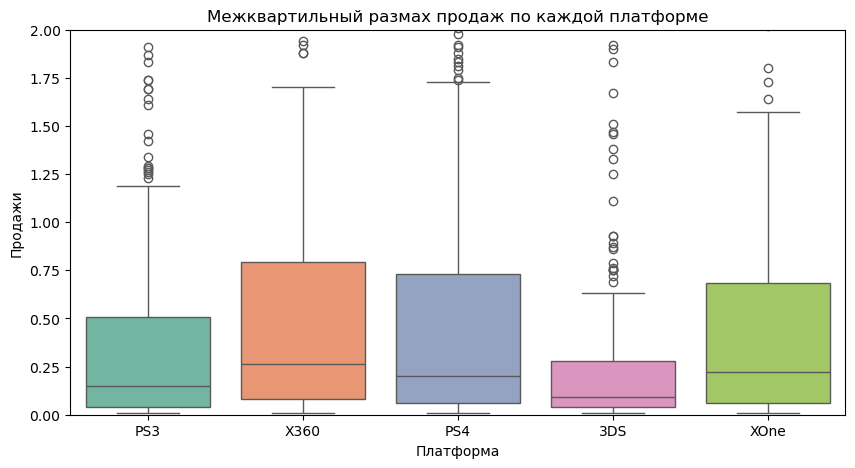

In [106]:
plt.figure(figsize = (10,5))
sns.boxplot(data=data_top_5, x = 'platform', y='total_sales', hue= 'platform', palette='Set2')
plt.ylim(0, 2)
plt.title('Межквартильный размах продаж по каждой платформе')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

**Вывод:**

**В качестве актуального периода для нашего исследование выбрано начало 2013 года.** Лидерами по продажам являются: PS4 (26 590 000 проданных копий игр для платформы), далее идет PS3 (15 466 000 копий) и на третьем месте - XOne (14 505 000 копий). 

По графику распределения платформ по годам можно отследить, PS3 стремительно теряла свою популярность, поэтому вместо нее лучше обратиться к 3DS, которая имеет не такие большие потери к анализируемому 2016 году. Важно отметить, что графики всех представленных платформ идут вниз, начиная с 2015 года. Это можно объяснить тем, что физические копии игр потеряли свою актуальность с ростом облачных и цифровых вариантов. 

График межквартильного размаха платформ хорошо характеризует надежность продаж каждой консоли. Так, например, X360 обладает довольно большим межквартильным размахом, что говорит о большей неодноднородности данных, продажи на такой платформе более непостоянны. Медианные значения и количество выбросов всех платформ отличаются. 

Платформы, входящие в топ-5, можно назвать потенциально прибыльными за счет хороших выбросов, отвечающих за самые продаваемые игры.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

**Рассмотрим платформу PS4**

In [108]:
ps4_corr = data_2013.query('platform == "PS4"')

Коэффициент корреляции Пирсона: 0.40656790206178095


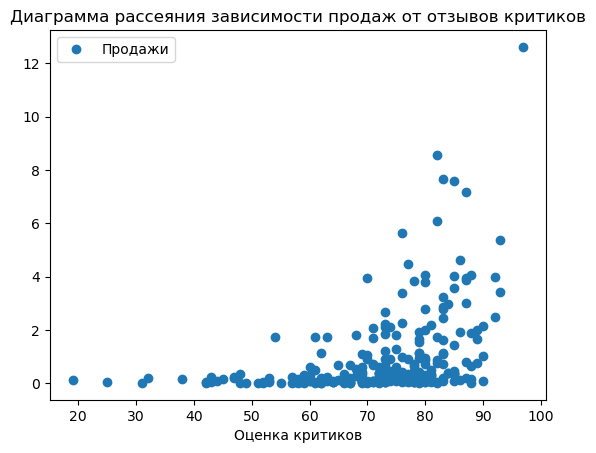

Коэффициент корреляции Пирсона: -0.031957110204556424


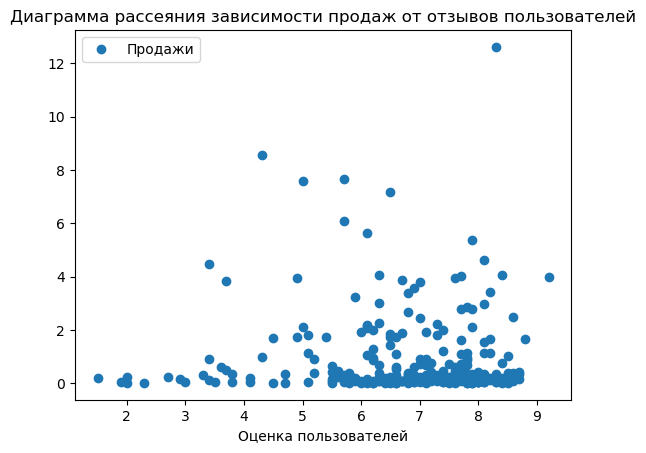

In [110]:
print(f'Коэффициент корреляции Пирсона: {ps4_corr['critic_score'].corr(ps4_corr['total_sales'])}')
ps4_corr.plot(style = 'o', x = 'critic_score', y = 'total_sales', label = 'Продажи')
plt.xlabel('Оценка критиков')
plt.title('Диаграмма рассеяния зависимости продаж от отзывов критиков')
plt.show()
print(f'Коэффициент корреляции Пирсона: {ps4_corr['user_score'].corr(ps4_corr['total_sales'])}')
ps4_corr.plot(style = 'o', x = 'user_score', y = 'total_sales', label = 'Продажи')
plt.xlabel('Оценка пользователей')
plt.title('Диаграмма рассеяния зависимости продаж от отзывов пользователей')
plt.show()

**Вывод:**

Коэффициент корреляции Пирсона для заивисимости продаж от оценки пользователей близок к нулю, значит, между этими значениями нет линейной зависимости для роста или падения в зависимости от оценки.\
А вот коэффициент корреляции Пирсона для оценок критиков уже имеет значение 40%, что подсказывает нам наличие взаимосвязи между высокой оценкой критика/ростом продаж и наоборот.

**Соотнесите выводы с продажами игр на других платформах.**

In [115]:
a = data_2013.groupby('platform')['total_sales'].sum().sort_values(ascending = False).index[:5]

Коэффициент корреляции Пирсона: -0.031957110204556424


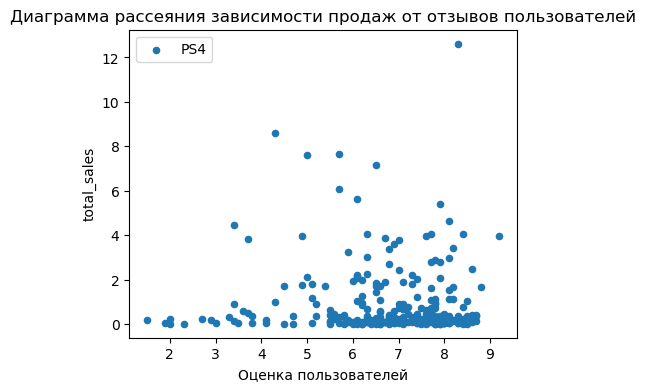

Коэффициент корреляции Пирсона: 0.40656790206178095


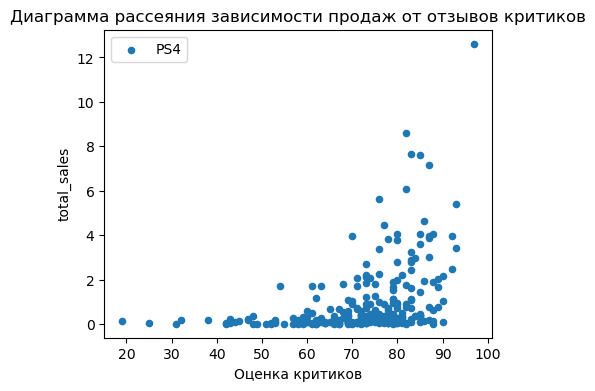

Коэффициент корреляции Пирсона: 0.0023944027357566925


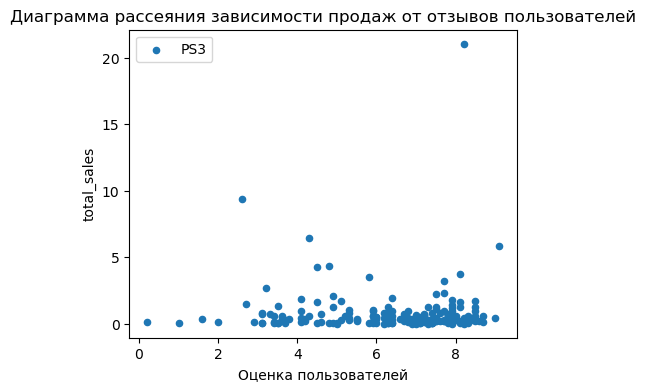

Коэффициент корреляции Пирсона: 0.3342853393371919


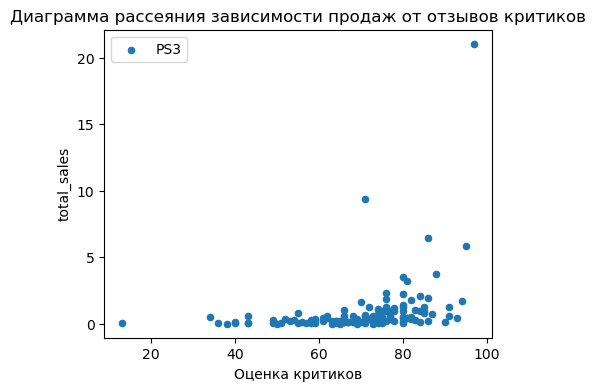

Коэффициент корреляции Пирсона: -0.06892505328279414


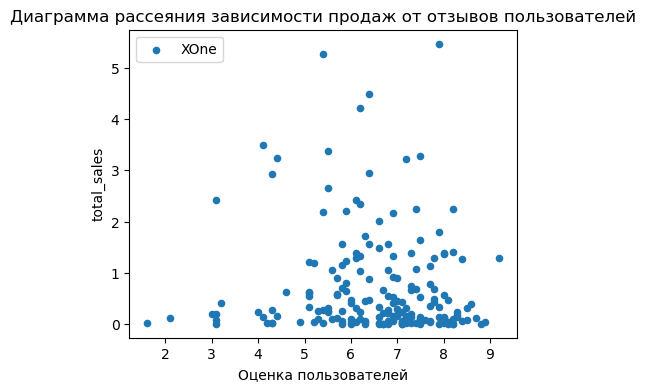

Коэффициент корреляции Пирсона: 0.4169983280084017


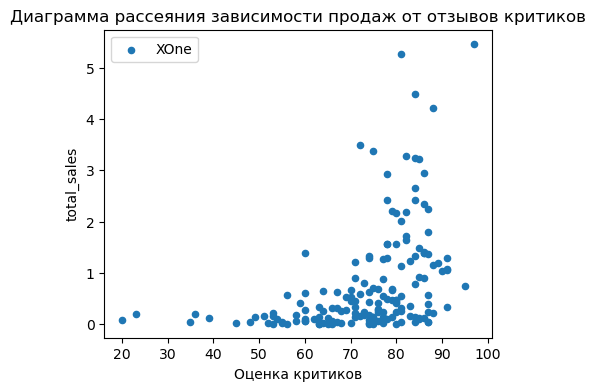

Коэффициент корреляции Пирсона: 0.24150411773563016


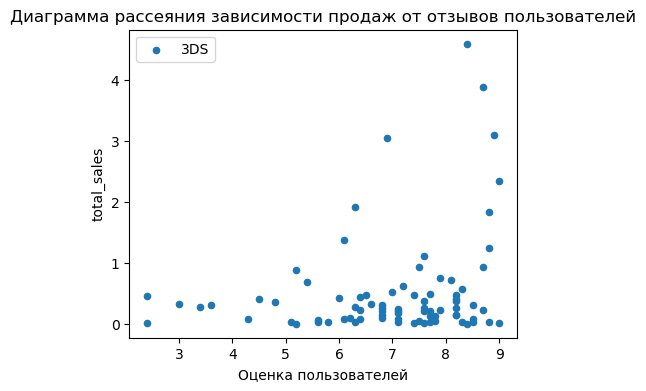

Коэффициент корреляции Пирсона: 0.3570566142288103


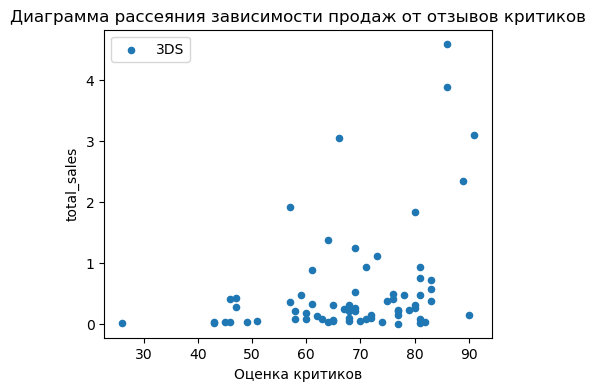

Коэффициент корреляции Пирсона: -0.011742185147181342


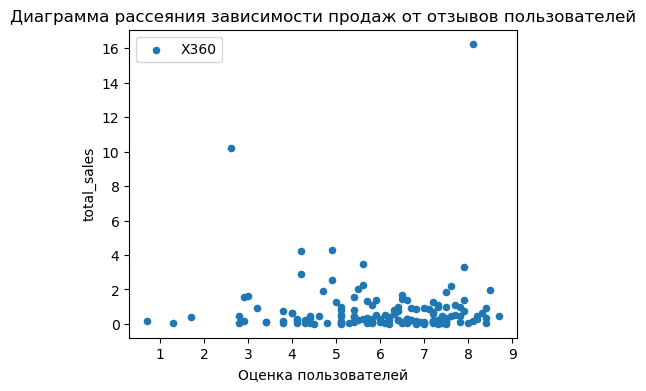

Коэффициент корреляции Пирсона: 0.3503445460228664


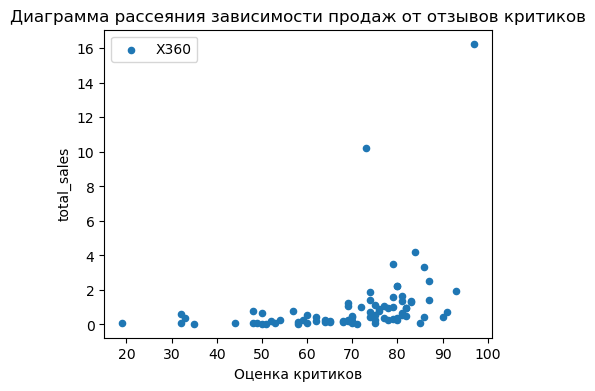

In [117]:
for platform in a: 
    (data_2013
     .query('platform == @platform')
     .plot(kind='scatter', x = 'user_score', y = 'total_sales', figsize = (5, 4), label=platform)
    )
    print(f'Коэффициент корреляции Пирсона: {data_2013.query('platform == @platform')['user_score']\
    .corr(data_2013.query('platform == @platform')['total_sales'])}')
    plt.title('Диаграмма рассеяния зависимости продаж от отзывов пользователей')
    plt.xlabel('Оценка пользователей')
    plt.show()
    (data_2013
    .query('platform == @platform')
    .plot(kind='scatter', x = 'critic_score', y = 'total_sales', figsize = (5, 4), label=platform)
    )
    print(f'Коэффициент корреляции Пирсона: {data_2013.query('platform == @platform')['critic_score']\
    .corr(data_2013.query('platform == @platform')['total_sales'])}')
    plt.title('Диаграмма рассеяния зависимости продаж от отзывов критиков')
    plt.xlabel('Оценка критиков')
    plt.show()

**Для других платформ заивимость между оценкой и продажами следующая:**
* **PS3** - нет зависимости от отзывов пользователей, но небольшая зависимость (34%) от оценки критиков
* **XOne** - нет зависимости от отзывов пользователей, зависимость от оценки критиков - 42%
* **3DS** - подросла зависимость от отзыва пользователей (24%), от критиков - 36%
* **Х360** - нет зависимости от отзывов пользователей, от критиков - 35%

**Среди оценок решающим является именно отзыв критиков, а не пользователей**

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

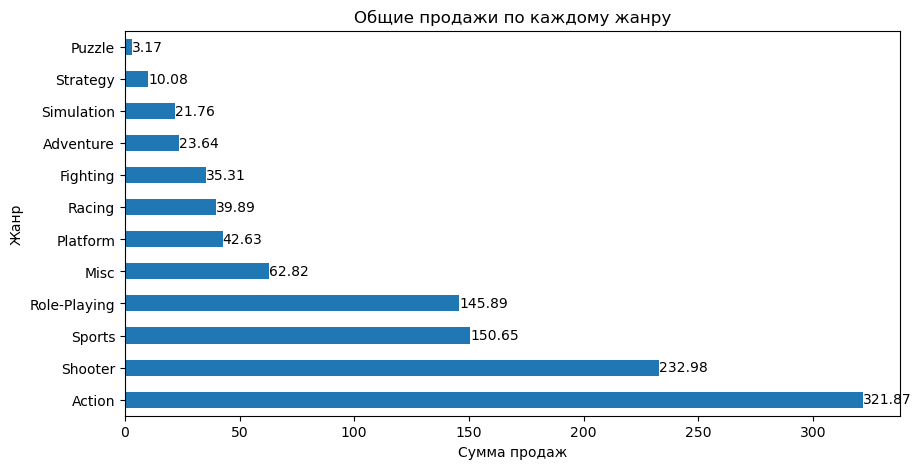

In [119]:
genre_sales_2013 = (data_2013
                  .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
                  .sort_values(by = 'total_sales', ascending = False)
                 )
ax = genre_sales_2013.plot.barh(
    y='total_sales', 
    figsize=(10, 5),
    legend = False
)
ax.bar_label(ax.containers[0]) # Делаем аннотацию столбцов 
plt.xlabel('Сумма продаж')
plt.ylabel('Жанр')
plt.title('Общие продажи по каждому жанру')
plt.show()

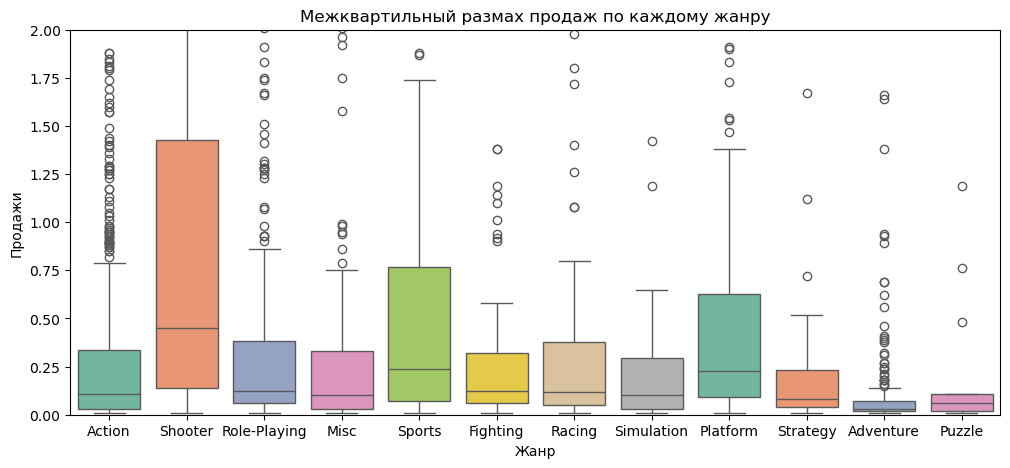

In [123]:
plt.figure(figsize = (12,5))
sns.boxplot(data=data_2013, x='genre', y='total_sales', hue= 'genre', palette='Set2')
plt.ylim(0, 2)
plt.title('Межквартильный размах продаж по каждому жанру')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

**Вывод:**

Самыми прибыльными жанрами являются:
* Экшены
* Шутеры
* Ролевые
* Спортивные
При этом экшены, например, имеют маленький межквартильный размах и огромное количество выбросов, а шутеры наоборот.

### Составьте портрет пользователя каждого региона

**Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [129]:
# Данные о топ-5 платформах за актуальный период
data_top_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


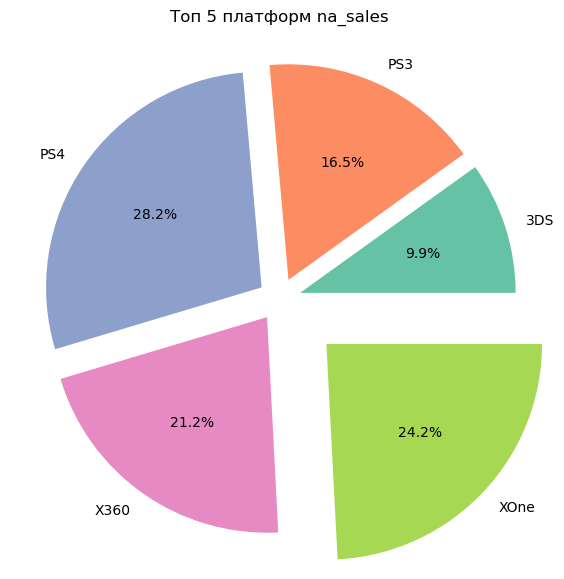

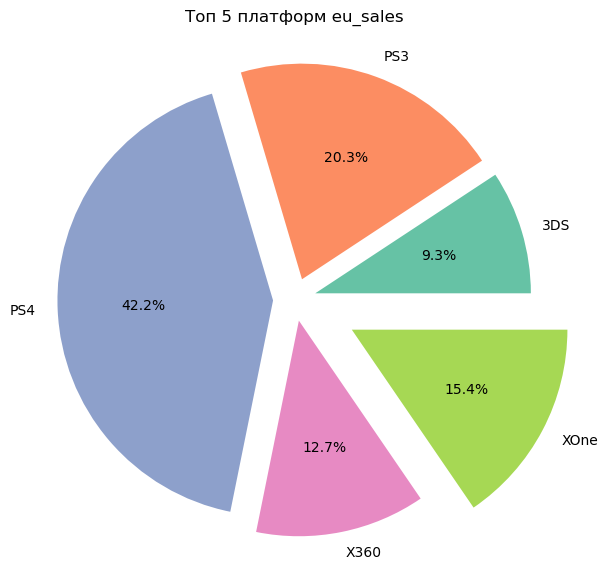

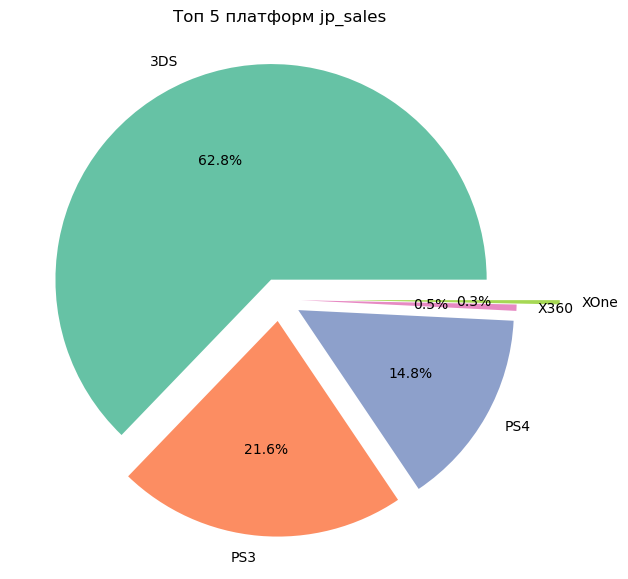

In [131]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
explode = [0.1, 0.1, 0.1, 0.1, 0.3]
for column in columns:
    (data_top_5
        .pivot_table(index = 'platform', values = column, aggfunc = 'sum')
        .plot(
            title = (f'Топ 5 платформ {column}'),
            kind = 'pie',
            y = column,
            figsize = (10,7),
            legend = False,
            autopct='%1.1f%%',
            explode=explode,
            colors=sns.color_palette('Set2')
        )
    )
    plt.ylabel(None)
    plt.show()


**Северная Америка и Европа имеют схожие результаты, Япония отличилась платформой 3DS. В Америке на втором месте идет X360, в Японии и Европе - это PS3. Также в Японии почти совсем не популярные X360 и XOne, что логично, так как они предпочитают родные компании в виде Sony и Nintendo**

**Самые популярные жанры (топ-5). Поясните разницу.**

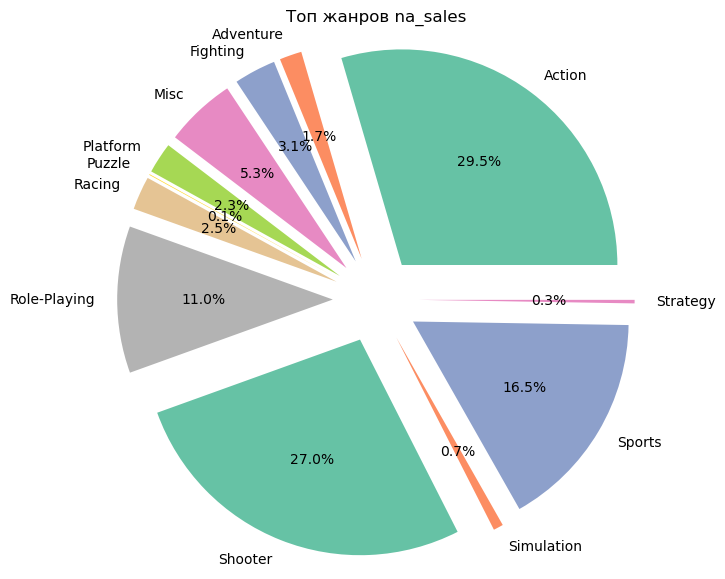

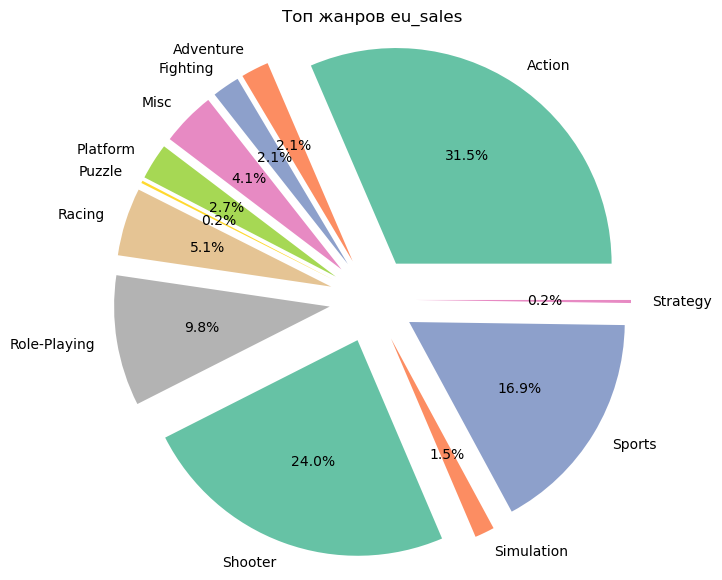

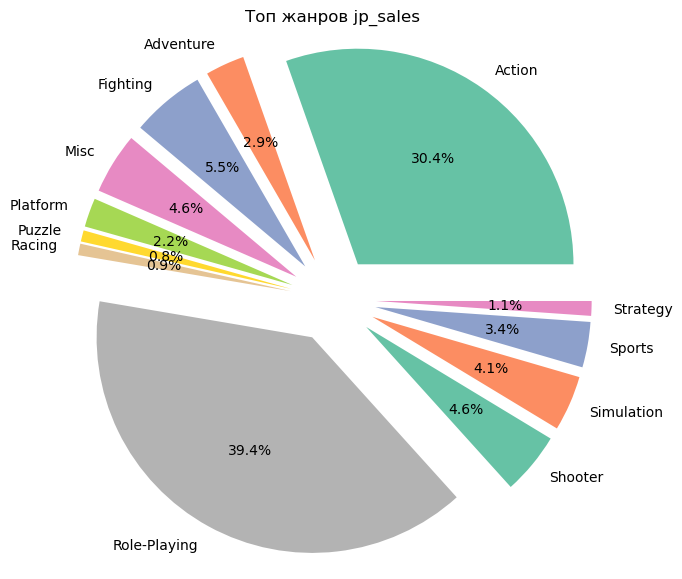

In [136]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
explode = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
for column in columns:
    (data_top_5
        .pivot_table(index = 'genre', values = column, aggfunc = 'sum')
        .plot(
            title = (f'Топ жанров {column}'),
            kind = 'pie',
            y = column,
            figsize = (10,7),
            legend = False,
            autopct='%1.1f%%',
            explode=explode,
            colors=sns.color_palette('Set2'),
        )
    )
    plt.ylabel(None)
    plt.show()


**По жанрам распредление в Северной Америке и Европе очень похоже, на первом месте Экшены, затем Шутеры и заключают тройку лидеров Спортивные игры. В Японии же самым популярным жанром являются Ролевые (одинокая японская душа), Экшены. Шутеры у японцев не так вызывают интерес.**

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

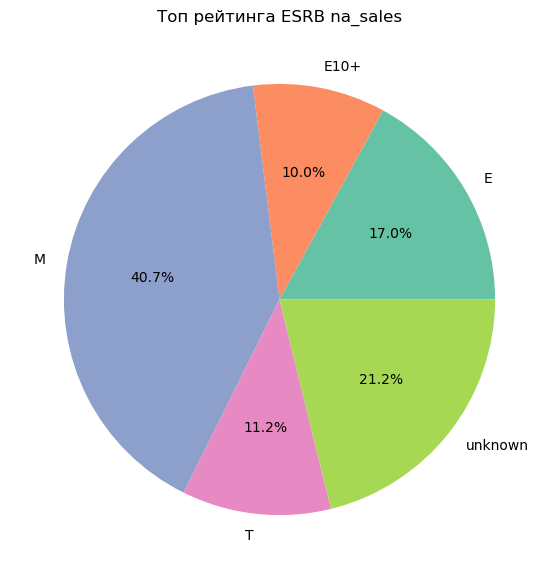

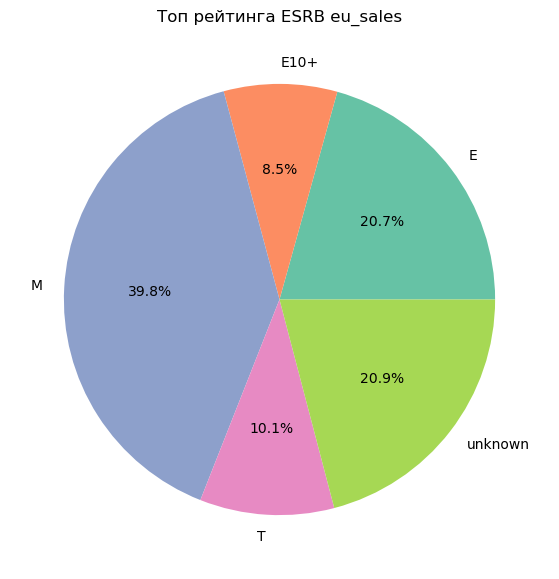

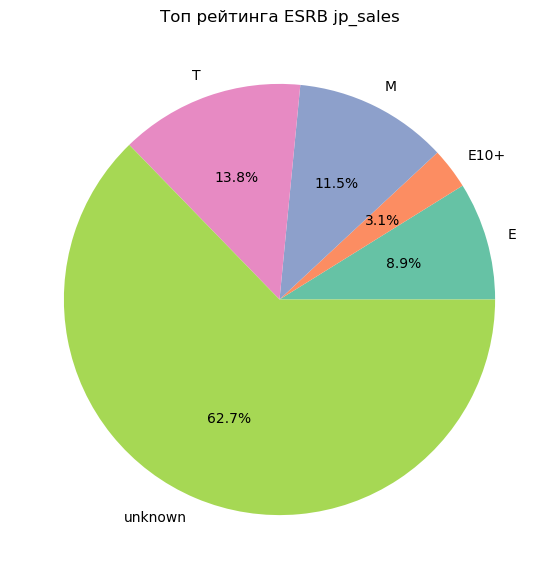

In [141]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

for column in columns:
    (data_top_5
        .pivot_table(index = 'rating', values = column, aggfunc = 'sum')
        .plot(
            title = (f'Топ рейтинга ESRB {column}'),
            kind = 'pie',
            y = column,
            figsize = (10,7),
            legend = False,
            autopct='%1.1f%%',
            colors=sns.color_palette('Set2')
        )
    )
    plt.ylabel(None)
    plt.show()


**По рейтингу ESRB в Севреной Америке и Европе почти половину составляет М, рейтинг для взрослых, что объясняется их любовью к шутерам и экшенам, где много волнующих кадров. В Японии огромную долю составляет таинственный неизвестный рейтинг, на самом деле, рейтинг ESRB используется для западного рынка, у японцев есть свой, поэтому и появилось такое преобладающее неизвестное значение.**

**Портрет пользователя Северной Америки:**
* Платформа - PS4
* Жанр - Экшен
* Рейтинг ESRB - M (Подходит для лиц старше 17 лет)

**Портрет пользователя Европы:** 
* Платформа - PS4
* Жанр - Экшен
* Рейтинг ESRB - M (Подходит для лиц старше 17 лет)

**Портрет пользователя Японии:**
* Платформа - 3DS
* Жанр - Ролевые
* Рейтинг ESRB - Неизвестный(уникальные японцы)

**Проверьте гипотезы**

**Гипотеза 1.** 

$H_0$: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

$H_1$: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [148]:
XOne = data_2013.loc[(data_2013['platform'] == 'XOne') & (~pd.isna(data_2013['user_score'])), 'user_score']
PC = data_2013.loc[(data_2013['platform'] == 'PC') & (~pd.isna(data_2013['user_score'])), 'user_score']

In [150]:
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC:', PC.mean())
alpha = 0.05
results = st.ttest_ind(
    XOne,
    PC,
    alternative = 'two-sided'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.2696774193548395
p-value: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза не была отвергнута, что позволяет нам предположить о достаточно близких значений среднего пользовательского рейтинга платформ Xbox One и PC. Это можно объяснить тем, что аудитория у данных платформ очень похожа и они выдерживают отличную конкуренцию друг с другом**

**Гипотеза 2.** 

$H_0$: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

$H_1$: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны

In [155]:
action = data_2013.loc[(data_2013['genre'] == 'Action') & (~pd.isna(data_2013['user_score'])), 'user_score']
sports = data_2013.loc[(data['genre'] == 'Sports') & (~pd.isna(data_2013['user_score'])), 'user_score']

In [157]:
print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Средний пользовательский рейтинг жанра Sports:', sports.mean())
alpha = 0.05
results = st.ttest_ind(
    action,
    sports,
    alternative = 'two-sided'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports: 5.238124999999999
p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


**В результате нулевая гипотеза была отвергнута, что дает нам предположение о разности пользовательского рейтинга в жанрах Action и Sport. Так как Action в принципе обладает статусом более популярного жанра, различие их рейтингов вполне правдоподобно**

# Общий вывод

В проведенном исследовании было получено много важных результатов, которые смогут помочь развитию магазина компьютерных игр 

**1. Обработка**
* Привели названия столбцов к общему виду 
* Изменили тип данных 
* Избавились от пропусков 
* Проверили данные на дубликаты, которых не оказалось
* Добавили новую информацию в таблицу

**2. Исследовательский анализ**
* Выпущенные игры
    * С 1980 по 2000 год очень медленное развитие индустрии
    * С 2002 года зафиксирован взлет продаж
    * 2008 и 2009 являются самыми прибыльными (1427 и 1426 игр соответственно)
    * Есть последующий спад из-за развития цифровых девайсов
* Игровые платформы
    * Самая популярная за весь период - PS2, семейство Sony с каждым новым поколением продолжает свою историю и всегда остается на верхушках показателей 
    * Топ конкурентов с их пиковой популярностью: PS2(2000-2004), X360 (2010-2012), Wii(2008-2010), PS3(2010-2012), DS(2007-2008), PS(1995-1997)

**В качестве актуального периода для нашего исследование выбрано начало 2013 года, так как здесь рынок уже значительно изменился, сместив платформы из прошлого рейтинга.**
* Топ лидеров: PS4, PS3, XOne, 3DS, X360
* Потенциально прибыльные платформы: PS4, XOne, 3DS

**В сфере оценки игр пользователи при покупке больше полагаются на оценку критиков, а не на оценку пользователей.**

* Самые прибыльные жанры
    * Экшены
    * Шутеры
    * Ролевые
    * Спортивные

**3. При анализе портрета игроков разных регионов, стало понятно, что западные игроки очень схожи в своих вкусах, предпочитая следующее:**
* Платформа - PS4
* Жанр - Экшен
* Рейтинг ESRB - M (Подходит для лиц старше 17 лет)

**Японский рынок отличается и требует к себе совсем другой подход:**
* Платформа - 3DS
* Жанр - Ролевые
* Рейтинг ESRB - Неизвестный(уникальные японцы)

**4. Анализ гипотез**
* **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** Нулевая гипотеза не была отвергнута, что позволяет нам предположить о достаточно близких значений среднего пользовательского рейтинга платформ Xbox One и PC. Это можно объяснить тем, что аудитория у данных платформ очень похожа и они выдерживают отличную конкуренцию друг с другом
* **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.** Нулевая гипотеза была отвергнута, что дает нам предположение о разности пользовательского рейтинга в жанрах Action и Sport. Так как Action в принципе обладает статусом более популярного жанра, различие их рейтингов вполне правдоподобно